# Projet 9 : Produisez une étude de marché (1ère partie : Préparation des données)

## I) Chargement

### A) Chargement libraires 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn import preprocessing
from sklearn import cluster, metrics
from sklearn import decomposition

### B)  Chargement Données

In [2]:
prod_anim = pd.read_csv('animaux.csv')
prod_vege = pd.read_csv('vege.csv')
pop = pd.read_csv('population.csv')
pop2013 = pd.read_csv('population2013.csv')
pib = pd.read_csv('PIB.csv')
prod_poulet = pd.read_csv('prod_poulet.csv')
terre = pd.read_csv('terre_elevage.csv')
credit = pd.read_csv('credit_agro.csv')
evoprix = pd.read_csv('evoprix.csv')
totalpou=pd.read_csv('totalpoulet.csv')
consopoulet=pd.read_csv('consopoulet.csv')

### C) Explication des choix de données 

prod_anim = Production d'une liste de produits issus de la production animal et leurs apports nutritifs par pays   
prod_vege = Production d'une liste de produits issus de la production végétale et leurs apports nutritifs par pays   
pop = Population par pays    
pop2013 = Population par pays à une date n-5   
pib = Produit Intérieur Brut par pays (permet de voir le niveau de richesse)   
prod_poulet = Production de poulet    
terre = Surface de terre agricoles exploités (culture et élevage )   
credit = Argent investi (général et agricole)   
evoprix = Inflation et augmentation du cout de la vie   

## II) Traitement des données 

### A) Traitement production animal

In [3]:
prod_anim.head()

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Bilans Alimentaires (2010-),2,Afghanistan,5511,Production,2731,Viande de Bovins,2018,2018,Milliers de tonnes,92.00,Im,Données de la FAO basées sur une méthodologie ...
1,FBS,Bilans Alimentaires (2010-),2,Afghanistan,5611,Importations - Quantité,2731,Viande de Bovins,2018,2018,Milliers de tonnes,5.00,Im,Données de la FAO basées sur une méthodologie ...
2,FBS,Bilans Alimentaires (2010-),2,Afghanistan,5301,Disponibilité intérieure,2731,Viande de Bovins,2018,2018,Milliers de tonnes,97.00,S,Données standardisées
3,FBS,Bilans Alimentaires (2010-),2,Afghanistan,645,Disponibilité alimentaire en quantité (kg/pers...,2731,Viande de Bovins,2018,2018,kg,2.62,Fc,Donnée calculée
4,FBS,Bilans Alimentaires (2010-),2,Afghanistan,664,Disponibilité alimentaire (Kcal/personne/jour),2731,Viande de Bovins,2018,2018,Kcal/personne/jour,15.00,Fc,Donnée calculée


In [4]:
prod_anim.shape[0]

29279

Il y a 29279 lignes 

Nettoyage colonne inutile 

In [5]:
prod_anim.drop(['Code Domaine', 'Domaine', 'Code année','Année' ,'Symbole', 'Description du Symbole'],  axis=1, inplace=True)

Verification

In [6]:
prod_anim.head(1)

,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Unité,Valeur
0,2,Afghanistan,5511,Production,2731,Viande de Bovins,Milliers de tonnes,92.0


ajout colonne "provenance" pour la future fusion 

In [7]:
prod_anim['Provenance'] = 'Animale'

Vérification du df (null ect)

In [8]:
prod_anim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29279 entries, 0 to 29278
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Code zone (FAO)  29279 non-null  int64  
 1   Zone             29279 non-null  object 
 2   Code Élément     29279 non-null  int64  
 3   Élément          29279 non-null  object 
 4   Code Produit     29279 non-null  int64  
 5   Produit          29279 non-null  object 
 6   Unité            29279 non-null  object 
 7   Valeur           29278 non-null  float64
 8   Provenance       29279 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 2.0+ MB


In [9]:
prod_anim[prod_anim['Valeur'].isna()]

,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Unité,Valeur,Provenance
5195,351,Chine,5511,Production,2743,Crème,Milliers de tonnes,NaN,Animale


Suppression de la ligne

In [10]:
prod_anim = prod_anim.dropna(axis=0, subset=['Valeur'])

### B) Traitement de la table de production végétale 

In [11]:
prod_vege

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Bilans Alimentaires (2010-),2,Afghanistan,5511,Production,2511,Blé et produits,2018,2018,Milliers de tonnes,3613.00,Im,Données de la FAO basées sur une méthodologie ...
1,FBS,Bilans Alimentaires (2010-),2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2018,2018,Milliers de tonnes,3419.00,Im,Données de la FAO basées sur une méthodologie ...
2,FBS,Bilans Alimentaires (2010-),2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2018,2018,Milliers de tonnes,0.00,Im,Données de la FAO basées sur une méthodologie ...
3,FBS,Bilans Alimentaires (2010-),2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2018,2018,Milliers de tonnes,7036.00,S,Données standardisées
4,FBS,Bilans Alimentaires (2010-),2,Afghanistan,645,Disponibilité alimentaire en quantité (kg/pers...,2511,Blé et produits,2018,2018,kg,160.12,Fc,Donnée calculée
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87994,FBS,Bilans Alimentaires (2010-),181,Zimbabwe,5301,Disponibilité intérieure,2899,Miscellanees,2018,2018,Milliers de tonnes,16.00,S,Données standardisées
87995,FBS,Bilans Alimentaires (2010-),181,Zimbabwe,645,Disponibilité alimentaire en quantité (kg/pers...,2899,Miscellanees,2018,2018,kg,1.08,Fc,Donnée calculée
87996,FBS,Bilans Alimentaires (2010-),181,Zimbabwe,664,Disponibilité alimentaire (Kcal/personne/jour),2899,Miscellanees,2018,2018,Kcal/personne/jour,1.00,Fc,Donnée calculée
87997,FBS,Bilans Alimentaires (2010-),181,Zimbabwe,674,Disponibilité de protéines en quantité (g/pers...,2899,Miscellanees,2018,2018,g/personne/jour,0.04,Fc,Donnée calculée


In [12]:
prod_vege.drop(['Code Domaine', 'Domaine', 'Code année','Année' ,'Symbole', 'Description du Symbole'],  axis=1, inplace=True)

In [13]:
prod_vege

,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Unité,Valeur
0,2,Afghanistan,5511,Production,2511,Blé et produits,Milliers de tonnes,3613.00
1,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,Milliers de tonnes,3419.00
2,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,Milliers de tonnes,0.00
3,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,Milliers de tonnes,7036.00
4,2,Afghanistan,645,Disponibilité alimentaire en quantité (kg/pers...,2511,Blé et produits,kg,160.12
...,...,...,...,...,...,...,...,...
87994,181,Zimbabwe,5301,Disponibilité intérieure,2899,Miscellanees,Milliers de tonnes,16.00
87995,181,Zimbabwe,645,Disponibilité alimentaire en quantité (kg/pers...,2899,Miscellanees,kg,1.08
87996,181,Zimbabwe,664,Disponibilité alimentaire (Kcal/personne/jour),2899,Miscellanees,Kcal/personne/jour,1.00
87997,181,Zimbabwe,674,Disponibilité de protéines en quantité (g/pers...,2899,Miscellanees,g/personne/jour,0.04


In [14]:
prod_vege['Provenance'] = 'Vegetale'

In [15]:
prod_vege.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87999 entries, 0 to 87998
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Code zone (FAO)  87999 non-null  int64  
 1   Zone             87999 non-null  object 
 2   Code Élément     87999 non-null  int64  
 3   Élément          87999 non-null  object 
 4   Code Produit     87999 non-null  int64  
 5   Produit          87999 non-null  object 
 6   Unité            87999 non-null  object 
 7   Valeur           87997 non-null  float64
 8   Provenance       87999 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 6.0+ MB


In [16]:
prod_vege[prod_vege['Valeur'].isna()]

,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Unité,Valeur,Provenance
16095,351,Chine,5511,Production,2580,Huile d'Olive,Milliers de tonnes,NaN,Vegetale
16191,351,Chine,5511,Production,2616,Bananes plantains,Milliers de tonnes,NaN,Vegetale


In [17]:
prod_vege = prod_vege.dropna(axis=0, subset=['Valeur'])

In [18]:
prodtotal= pd.concat([prod_vege, prod_anim])

### C) Création d'un DataFrame synthétique des produits 

In [19]:
synthprod = prodtotal.pivot_table(index=['Zone', 'Provenance'], 
                                            columns='Élément', values='Valeur', aggfunc=sum).reset_index()

In [20]:
synthprod

Élément,Zone,Provenance,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production
0,Afghanistan,Animale,187.0,50.46,12.84,10.68,2706.00,0.00,134.00,2574.00
1,Afghanistan,Vegetale,2080.0,314.85,28.61,46.93,13491.00,1316.00,6426.00,8219.00
2,Afrique du Sud,Animale,468.0,127.53,33.47,35.19,8482.00,845.91,1085.84,8459.05
3,Afrique du Sud,Vegetale,2431.0,399.44,54.05,44.76,55582.00,11317.00,6874.00,58493.00
4,Albanie,Animale,1000.0,387.98,68.69,60.86,1376.07,23.02,70.40,1328.70
...,...,...,...,...,...,...,...,...,...,...
355,États-Unis d'Amérique,Vegetale,2742.0,578.72,97.48,40.25,661690.00,181429.00,76518.00,781771.00
356,Éthiopie,Animale,102.0,37.35,6.73,6.49,4598.36,20.89,3.12,4615.13
357,Éthiopie,Vegetale,2345.0,330.88,23.72,64.91,50430.00,786.00,3902.00,48019.00
358,Îles Salomon,Animale,200.0,48.18,14.19,15.32,43.79,38.27,9.01,74.03


In [21]:
taux_animal = synthprod[synthprod['Provenance'] == 'Animale'].reset_index(drop=True)
del taux_animal['Provenance']
taux_animal

Élément,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production
0,Afghanistan,187.0,50.46,12.84,10.68,2706.00,0.00,134.00,2574.00
1,Afrique du Sud,468.0,127.53,33.47,35.19,8482.00,845.91,1085.84,8459.05
2,Albanie,1000.0,387.98,68.69,60.86,1376.07,23.02,70.40,1328.70
3,Algérie,380.0,101.69,22.23,24.30,4741.71,5.27,440.15,4357.83
4,Allemagne,1096.0,292.68,82.02,64.36,41530.00,17221.62,14122.21,45079.41
...,...,...,...,...,...,...,...,...,...
175,Émirats arabes unis,542.0,117.63,30.44,37.37,1917.18,566.41,2037.74,482.87
176,Équateur,527.0,164.02,40.69,30.06,2973.00,1149.19,146.29,3920.90
177,États-Unis d'Amérique,1117.0,397.90,80.94,74.72,158042.65,15244.41,9292.78,164137.27
178,Éthiopie,102.0,37.35,6.73,6.49,4598.36,20.89,3.12,4615.13


In [22]:
stprod= synthprod.groupby('Zone').sum().reset_index()

In [23]:
stprod

Élément,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production
0,Afghanistan,2267.0,365.31,41.45,57.61,16197.00,1316.00,6560.00,10793.00
1,Afrique du Sud,2899.0,526.97,87.52,79.95,64064.00,12162.91,7959.84,66952.05
2,Albanie,3295.0,1164.42,116.30,112.81,4819.07,169.02,717.40,4213.70
3,Algérie,3379.0,750.81,87.25,90.30,46336.71,412.27,18246.15,30237.83
4,Allemagne,3554.0,832.53,151.06,105.27,164144.00,48498.62,65200.21,147754.41
...,...,...,...,...,...,...,...,...,...
175,Émirats arabes unis,3048.0,455.43,119.63,81.71,10684.18,5268.41,13890.74,1754.87
176,Équateur,2556.0,554.97,97.26,62.05,22529.00,9197.19,2093.29,28909.90
177,États-Unis d'Amérique,3859.0,976.62,178.42,114.97,819732.65,196673.41,85810.78,945908.27
178,Éthiopie,2447.0,368.23,30.45,71.40,55028.36,806.89,3905.12,52634.13


In [24]:
stprod['taux prot.animal'] = round(taux_animal['Disponibilité de protéines en quantité (g/personne/jour)'] / stprod['Disponibilité de protéines en quantité (g/personne/jour)'] *100, 2)
stprod.head()

Élément,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,taux prot.animal
0,Afghanistan,2267.0,365.31,41.45,57.61,16197.00,1316.00,6560.00,10793.00,18.54
1,Afrique du Sud,2899.0,526.97,87.52,79.95,64064.00,12162.91,7959.84,66952.05,44.02
2,Albanie,3295.0,1164.42,116.30,112.81,4819.07,169.02,717.40,4213.70,53.95
3,Algérie,3379.0,750.81,87.25,90.30,46336.71,412.27,18246.15,30237.83,26.91
4,Allemagne,3554.0,832.53,151.06,105.27,164144.00,48498.62,65200.21,147754.41,61.14


### D) Traitement PIB

In [25]:
pib

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,MK,Indicateurs macro,2,Afghanistan,6110,Valeur US $,22008,Produit Intérieur Brut,2018,2018,millions,1.841885e+04,X,Sources internationales sûres,NaN
1,MK,Indicateurs macro,202,Afrique du Sud,6110,Valeur US $,22008,Produit Intérieur Brut,2018,2018,millions,3.680939e+05,X,Sources internationales sûres,NaN
2,MK,Indicateurs macro,3,Albanie,6110,Valeur US $,22008,Produit Intérieur Brut,2018,2018,millions,1.515644e+04,X,Sources internationales sûres,NaN
3,MK,Indicateurs macro,4,Algérie,6110,Valeur US $,22008,Produit Intérieur Brut,2018,2018,millions,1.754152e+05,X,Sources internationales sûres,NaN
4,MK,Indicateurs macro,79,Allemagne,6110,Valeur US $,22008,Produit Intérieur Brut,2018,2018,millions,3.977289e+06,X,Sources internationales sûres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,MK,Indicateurs macro,236,Venezuela (République bolivarienne du),6110,Valeur US $,22008,Produit Intérieur Brut,2018,2018,millions,2.040437e+05,X,Sources internationales sûres,NaN
207,MK,Indicateurs macro,237,Viet Nam,6110,Valeur US $,22008,Produit Intérieur Brut,2018,2018,millions,2.452137e+05,X,Sources internationales sûres,NaN
208,MK,Indicateurs macro,249,Yémen,6110,Valeur US $,22008,Produit Intérieur Brut,2018,2018,millions,2.290294e+04,X,Sources internationales sûres,NaN
209,MK,Indicateurs macro,251,Zambie,6110,Valeur US $,22008,Produit Intérieur Brut,2018,2018,millions,2.631198e+04,X,Sources internationales sûres,NaN


In [26]:
pib.drop(['Code Domaine', 'Domaine', 'Code année','Année','Code Élément' ,'Symbole','Code Produit','Unité', 'Description du Symbole','Note','Élément','Produit'],  axis=1, inplace=True)

In [27]:
pib

,Code zone (FAO),Zone,Valeur
0,2,Afghanistan,1.841885e+04
1,202,Afrique du Sud,3.680939e+05
2,3,Albanie,1.515644e+04
3,4,Algérie,1.754152e+05
4,79,Allemagne,3.977289e+06
...,...,...,...
206,236,Venezuela (République bolivarienne du),2.040437e+05
207,237,Viet Nam,2.452137e+05
208,249,Yémen,2.290294e+04
209,251,Zambie,2.631198e+04


In [28]:
pib.rename(columns={'Valeur': 'Pib (en million de dollars)'}, inplace=True)

In [29]:
pib

,Code zone (FAO),Zone,Pib (en million de dollars)
0,2,Afghanistan,1.841885e+04
1,202,Afrique du Sud,3.680939e+05
2,3,Albanie,1.515644e+04
3,4,Algérie,1.754152e+05
4,79,Allemagne,3.977289e+06
...,...,...,...
206,236,Venezuela (République bolivarienne du),2.040437e+05
207,237,Viet Nam,2.452137e+05
208,249,Yémen,2.290294e+04
209,251,Zambie,2.631198e+04


### E) Traitement Population 

In [30]:
pop

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2018,2018,1000 personnes,37171.921,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,202,Afrique du Sud,511,Population totale,3010,Population-Estimations,2018,2018,1000 personnes,57792.518,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,3,Albanie,511,Population totale,3010,Population-Estimations,2018,2018,1000 personnes,2882.740,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,4,Algérie,511,Population totale,3010,Population-Estimations,2018,2018,1000 personnes,42228.408,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,79,Allemagne,511,Population totale,3010,Population-Estimations,2018,2018,1000 personnes,83124.418,X,Sources internationales sûres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,OA,Séries temporelles annuelles,236,Venezuela (République bolivarienne du),511,Population totale,3010,Population-Estimations,2018,2018,1000 personnes,28887.118,X,Sources internationales sûres,NaN
233,OA,Séries temporelles annuelles,237,Viet Nam,511,Population totale,3010,Population-Estimations,2018,2018,1000 personnes,95545.962,X,Sources internationales sûres,NaN
234,OA,Séries temporelles annuelles,249,Yémen,511,Population totale,3010,Population-Estimations,2018,2018,1000 personnes,28498.683,X,Sources internationales sûres,NaN
235,OA,Séries temporelles annuelles,251,Zambie,511,Population totale,3010,Population-Estimations,2018,2018,1000 personnes,17351.708,X,Sources internationales sûres,NaN


In [31]:
pop.drop(['Code Domaine', 'Domaine','Code Élément','Élément', 'Code Produit', 'Produit', 
                 'Code année', 'Unité', 'Symbole', 'Description du Symbole','Note'], axis=1, inplace=True)

In [32]:
pop

,Code zone (FAO),Zone,Année,Valeur
0,2,Afghanistan,2018,37171.921
1,202,Afrique du Sud,2018,57792.518
2,3,Albanie,2018,2882.740
3,4,Algérie,2018,42228.408
4,79,Allemagne,2018,83124.418
...,...,...,...,...
232,236,Venezuela (République bolivarienne du),2018,28887.118
233,237,Viet Nam,2018,95545.962
234,249,Yémen,2018,28498.683
235,251,Zambie,2018,17351.708


Téléchargement de pop n-5 pour évolution 

In [33]:
pop2013.drop(['Code Domaine', 'Domaine','Code Élément','Élément', 'Code Produit', 'Produit', 
                 'Code année', 'Unité', 'Symbole', 'Description du Symbole','Note'], axis=1, inplace=True)

In [34]:
pop2013

,Code zone (FAO),Zone,Année,Valeur
0,2,Afghanistan,2013,32269.589
1,202,Afrique du Sud,2013,53687.121
2,3,Albanie,2013,2903.790
3,4,Algérie,2013,38140.133
4,79,Allemagne,2013,81174.367
...,...,...,...,...
232,236,Venezuela (République bolivarienne du),2013,29781.040
233,237,Viet Nam,2013,90752.592
234,249,Yémen,2013,25147.109
235,251,Zambie,2013,14926.544


In [35]:
poptotal = pd.merge(pop, pop2013, on='Zone')

In [36]:
poptotal

,Code zone (FAO)_x,Zone,Année_x,Valeur_x,Code zone (FAO)_y,Année_y,Valeur_y
0,2,Afghanistan,2018,37171.921,2,2013,32269.589
1,202,Afrique du Sud,2018,57792.518,202,2013,53687.121
2,3,Albanie,2018,2882.740,3,2013,2903.790
3,4,Algérie,2018,42228.408,4,2013,38140.133
4,79,Allemagne,2018,83124.418,79,2013,81174.367
...,...,...,...,...,...,...,...
232,236,Venezuela (République bolivarienne du),2018,28887.118,236,2013,29781.040
233,237,Viet Nam,2018,95545.962,237,2013,90752.592
234,249,Yémen,2018,28498.683,249,2013,25147.109
235,251,Zambie,2018,17351.708,251,2013,14926.544


In [37]:
poptotal.rename(columns={'Valeur_x': 'Population 2018', 'Valeur_y': 'Population 2013','Code zone (FAO)_x': 'Code zone'}, inplace=True)

In [38]:
poptotal

,Code zone,Zone,Année_x,Population 2018,Code zone (FAO)_y,Année_y,Population 2013
0,2,Afghanistan,2018,37171.921,2,2013,32269.589
1,202,Afrique du Sud,2018,57792.518,202,2013,53687.121
2,3,Albanie,2018,2882.740,3,2013,2903.790
3,4,Algérie,2018,42228.408,4,2013,38140.133
4,79,Allemagne,2018,83124.418,79,2013,81174.367
...,...,...,...,...,...,...,...
232,236,Venezuela (République bolivarienne du),2018,28887.118,236,2013,29781.040
233,237,Viet Nam,2018,95545.962,237,2013,90752.592
234,249,Yémen,2018,28498.683,249,2013,25147.109
235,251,Zambie,2018,17351.708,251,2013,14926.544


In [39]:
poptotal.drop(['Année_x'], axis=1, inplace=True)
poptotal.drop(['Code zone (FAO)_y'], axis=1, inplace=True)
poptotal.drop(['Année_y'], axis=1, inplace=True)

In [40]:
poptotal['Evolution population (sur 5 ans)'] = round(((poptotal['Population 2018'] - poptotal['Population 2013']))\
                                           / poptotal['Population 2013'] *100, 2)

In [41]:
poptotal

,Code zone,Zone,Population 2018,Population 2013,Evolution population (sur 5 ans)
0,2,Afghanistan,37171.921,32269.589,15.19
1,202,Afrique du Sud,57792.518,53687.121,7.65
2,3,Albanie,2882.740,2903.790,-0.72
3,4,Algérie,42228.408,38140.133,10.72
4,79,Allemagne,83124.418,81174.367,2.40
...,...,...,...,...,...
232,236,Venezuela (République bolivarienne du),28887.118,29781.040,-3.00
233,237,Viet Nam,95545.962,90752.592,5.28
234,249,Yémen,28498.683,25147.109,13.33
235,251,Zambie,17351.708,14926.544,16.25


In [42]:
poptotal.drop(['Population 2013'], axis=1, inplace=True)

In [43]:
poptotal['Population 2018']=poptotal['Population 2018']*1000

In [44]:
dftest = pd.merge(stprod, pib, on='Zone', how='right')
dftest.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,taux prot.animal,Code zone (FAO),Pib (en million de dollars)
0,Afghanistan,2267.0,365.31,41.45,57.61,16197.00,1316.00,6560.00,10793.00,18.54,2,1.841885e+04
1,Afrique du Sud,2899.0,526.97,87.52,79.95,64064.00,12162.91,7959.84,66952.05,44.02,202,3.680939e+05
2,Albanie,3295.0,1164.42,116.30,112.81,4819.07,169.02,717.40,4213.70,53.95,3,1.515644e+04
3,Algérie,3379.0,750.81,87.25,90.30,46336.71,412.27,18246.15,30237.83,26.91,4,1.754152e+05
4,Allemagne,3554.0,832.53,151.06,105.27,164144.00,48498.62,65200.21,147754.41,61.14,79,3.977289e+06


In [45]:
filtre_pop= dftest[dftest['Disponibilité alimentaire (Kcal/personne/jour)'].isnull()]

In [46]:
filtre_pop

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,taux prot.animal,Code zone (FAO),Pib (en million de dollars)
5,Andorre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,3218.419456
7,Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258,322.455556
12,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,3202.189944
17,Bahreïn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,37654.023604
24,Bermudes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,7224.328000
25,Bhoutan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,2446.867538
30,Brunéi Darussalam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26,13566.912772
51,Curaçao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,279,3127.908441
59,Érythrée,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,178,2005.658375
75,Groenland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85,3040.405232


In [47]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211 entries, 0 to 210
Data columns (total 12 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           211 non-null    object 
 1   Disponibilité alimentaire (Kcal/personne/jour)                 179 non-null    float64
 2   Disponibilité alimentaire en quantité (kg/personne/an)         179 non-null    float64
 3   Disponibilité de matière grasse en quantité (g/personne/jour)  179 non-null    float64
 4   Disponibilité de protéines en quantité (g/personne/jour)       179 non-null    float64
 5   Disponibilité intérieure                                       179 non-null    float64
 6   Exportations - Quantité                                        179 non-null    float64
 7   Importations - Quantité                                       

In [48]:
dftest.dropna()

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,taux prot.animal,Code zone (FAO),Pib (en million de dollars)
0,Afghanistan,2267.0,365.31,41.45,57.61,16197.00,1316.00,6560.00,10793.00,18.54,2,1.841885e+04
1,Afrique du Sud,2899.0,526.97,87.52,79.95,64064.00,12162.91,7959.84,66952.05,44.02,202,3.680939e+05
2,Albanie,3295.0,1164.42,116.30,112.81,4819.07,169.02,717.40,4213.70,53.95,3,1.515644e+04
3,Algérie,3379.0,750.81,87.25,90.30,46336.71,412.27,18246.15,30237.83,26.91,4,1.754152e+05
4,Allemagne,3554.0,832.53,151.06,105.27,164144.00,48498.62,65200.21,147754.41,61.14,79,3.977289e+06
...,...,...,...,...,...,...,...,...,...,...,...,...
206,Venezuela (République bolivarienne du),2226.0,510.45,84.03,50.48,23361.75,45.09,4769.25,18574.58,47.56,236,2.040437e+05
207,Viet Nam,2919.0,692.70,77.71,86.36,115302.51,25743.77,21564.47,130716.81,38.26,237,2.452137e+05
208,Yémen,2008.0,291.05,40.67,51.59,9395.89,374.83,6073.17,3154.39,20.02,249,2.290294e+04
209,Zambie,2252.0,431.05,51.96,58.04,15609.90,504.77,492.38,15140.30,24.47,251,2.631198e+04


In [49]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211 entries, 0 to 210
Data columns (total 12 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           211 non-null    object 
 1   Disponibilité alimentaire (Kcal/personne/jour)                 179 non-null    float64
 2   Disponibilité alimentaire en quantité (kg/personne/an)         179 non-null    float64
 3   Disponibilité de matière grasse en quantité (g/personne/jour)  179 non-null    float64
 4   Disponibilité de protéines en quantité (g/personne/jour)       179 non-null    float64
 5   Disponibilité intérieure                                       179 non-null    float64
 6   Exportations - Quantité                                        179 non-null    float64
 7   Importations - Quantité                                       

In [50]:
dftest = pd.merge(dftest, poptotal, on='Zone', how='right')
dftest.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,taux prot.animal,Code zone (FAO),Pib (en million de dollars),Code zone,Population 2018,Evolution population (sur 5 ans)
0,Afghanistan,2267.0,365.31,41.45,57.61,16197.00,1316.00,6560.00,10793.00,18.54,2.0,1.841885e+04,2,37171921.0,15.19
1,Afrique du Sud,2899.0,526.97,87.52,79.95,64064.00,12162.91,7959.84,66952.05,44.02,202.0,3.680939e+05,202,57792518.0,7.65
2,Albanie,3295.0,1164.42,116.30,112.81,4819.07,169.02,717.40,4213.70,53.95,3.0,1.515644e+04,3,2882740.0,-0.72
3,Algérie,3379.0,750.81,87.25,90.30,46336.71,412.27,18246.15,30237.83,26.91,4.0,1.754152e+05,4,42228408.0,10.72
4,Allemagne,3554.0,832.53,151.06,105.27,164144.00,48498.62,65200.21,147754.41,61.14,79.0,3.977289e+06,79,83124418.0,2.40


In [51]:
filtre_pop = dftest[dftest['Disponibilité alimentaire (Kcal/personne/jour)'].isnull()]

In [52]:
filtre_pop

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,taux prot.animal,Code zone (FAO),Pib (en million de dollars),Code zone,Population 2018,Evolution population (sur 5 ans)
5,Andorre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,3218.419456,6,77006.0,-4.66
7,Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.0,322.455556,258,14731.0,5.57
9,Antilles néerlandaises (ex),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,151,277483.0,5.16
13,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,3202.189944,22,105845.0,2.60
18,Bahreïn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,37654.023604,13,1569446.0,19.35
25,Bermudes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,7224.328000,17,62756.0,-2.53
26,Bhoutan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,2446.867538,18,754388.0,6.22
28,"Bonaire, Saint-Eustache et Saba",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,278,25711.0,9.39
32,Brunéi Darussalam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,13566.912772,26,428963.0,6.07
45,"Chine, Taiwan Province de",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,214,23726460.0,1.30


In [53]:
dftest.dropna()

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,taux prot.animal,Code zone (FAO),Pib (en million de dollars),Code zone,Population 2018,Evolution population (sur 5 ans)
0,Afghanistan,2267.0,365.31,41.45,57.61,16197.00,1316.00,6560.00,10793.00,18.54,2.0,1.841885e+04,2,37171921.0,15.19
1,Afrique du Sud,2899.0,526.97,87.52,79.95,64064.00,12162.91,7959.84,66952.05,44.02,202.0,3.680939e+05,202,57792518.0,7.65
2,Albanie,3295.0,1164.42,116.30,112.81,4819.07,169.02,717.40,4213.70,53.95,3.0,1.515644e+04,3,2882740.0,-0.72
3,Algérie,3379.0,750.81,87.25,90.30,46336.71,412.27,18246.15,30237.83,26.91,4.0,1.754152e+05,4,42228408.0,10.72
4,Allemagne,3554.0,832.53,151.06,105.27,164144.00,48498.62,65200.21,147754.41,61.14,79.0,3.977289e+06,79,83124418.0,2.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,Venezuela (République bolivarienne du),2226.0,510.45,84.03,50.48,23361.75,45.09,4769.25,18574.58,47.56,236.0,2.040437e+05,236,28887118.0,-3.00
233,Viet Nam,2919.0,692.70,77.71,86.36,115302.51,25743.77,21564.47,130716.81,38.26,237.0,2.452137e+05,237,95545962.0,5.28
234,Yémen,2008.0,291.05,40.67,51.59,9395.89,374.83,6073.17,3154.39,20.02,249.0,2.290294e+04,249,28498683.0,13.33
235,Zambie,2252.0,431.05,51.96,58.04,15609.90,504.77,492.38,15140.30,24.47,251.0,2.631198e+04,251,17351708.0,16.25


In [54]:
dftest.dropna()

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,taux prot.animal,Code zone (FAO),Pib (en million de dollars),Code zone,Population 2018,Evolution population (sur 5 ans)
0,Afghanistan,2267.0,365.31,41.45,57.61,16197.00,1316.00,6560.00,10793.00,18.54,2.0,1.841885e+04,2,37171921.0,15.19
1,Afrique du Sud,2899.0,526.97,87.52,79.95,64064.00,12162.91,7959.84,66952.05,44.02,202.0,3.680939e+05,202,57792518.0,7.65
2,Albanie,3295.0,1164.42,116.30,112.81,4819.07,169.02,717.40,4213.70,53.95,3.0,1.515644e+04,3,2882740.0,-0.72
3,Algérie,3379.0,750.81,87.25,90.30,46336.71,412.27,18246.15,30237.83,26.91,4.0,1.754152e+05,4,42228408.0,10.72
4,Allemagne,3554.0,832.53,151.06,105.27,164144.00,48498.62,65200.21,147754.41,61.14,79.0,3.977289e+06,79,83124418.0,2.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,Venezuela (République bolivarienne du),2226.0,510.45,84.03,50.48,23361.75,45.09,4769.25,18574.58,47.56,236.0,2.040437e+05,236,28887118.0,-3.00
233,Viet Nam,2919.0,692.70,77.71,86.36,115302.51,25743.77,21564.47,130716.81,38.26,237.0,2.452137e+05,237,95545962.0,5.28
234,Yémen,2008.0,291.05,40.67,51.59,9395.89,374.83,6073.17,3154.39,20.02,249.0,2.290294e+04,249,28498683.0,13.33
235,Zambie,2252.0,431.05,51.96,58.04,15609.90,504.77,492.38,15140.30,24.47,251.0,2.631198e+04,251,17351708.0,16.25


In [55]:
dftest.drop(['Code zone (FAO)'], axis=1, inplace=True)

### F) Traitement Production poulet 

In [56]:
prod_poulet

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit (FAO),Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,QCL,Cultures et produits animaux,2,Afghanistan,5112,Réserves,1057,Poulets,2018,2018,1000 têtes,14388,Im,Données de la FAO basées sur une méthodologie ...
1,QCL,Cultures et produits animaux,202,Afrique du Sud,5112,Réserves,1057,Poulets,2018,2018,1000 têtes,176078,Im,Données de la FAO basées sur une méthodologie ...
2,QCL,Cultures et produits animaux,3,Albanie,5112,Réserves,1057,Poulets,2018,2018,1000 têtes,7272,NaN,Donnée officielle
3,QCL,Cultures et produits animaux,4,Algérie,5112,Réserves,1057,Poulets,2018,2018,1000 têtes,135473,Im,Données de la FAO basées sur une méthodologie ...
4,QCL,Cultures et produits animaux,7,Angola,5112,Réserves,1057,Poulets,2018,2018,1000 têtes,37670,Im,Données de la FAO basées sur une méthodologie ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,QCL,Cultures et produits animaux,236,Venezuela (République bolivarienne du),5112,Réserves,1057,Poulets,2018,2018,1000 têtes,128732,Im,Données de la FAO basées sur une méthodologie ...
184,QCL,Cultures et produits animaux,237,Viet Nam,5112,Réserves,1057,Poulets,2018,2018,1000 têtes,316916,NaN,Donnée officielle
185,QCL,Cultures et produits animaux,249,Yémen,5112,Réserves,1057,Poulets,2018,2018,1000 têtes,66309,Im,Données de la FAO basées sur une méthodologie ...
186,QCL,Cultures et produits animaux,251,Zambie,5112,Réserves,1057,Poulets,2018,2018,1000 têtes,39399,Im,Données de la FAO basées sur une méthodologie ...


In [57]:
prod_poulet.drop(['Code Domaine','Code zone (FAO)', 'Domaine','Code Élément', 'Élément','Code Produit (FAO)','Unité','Produit','Code année','Année' ,'Symbole', 'Description du Symbole'],  axis=1, inplace=True)

In [58]:
prod_poulet['Valeur']=prod_poulet['Valeur']*1000

In [59]:
prod_poulet.rename(columns={'Valeur': 'Production poulet'}, inplace=True)

In [60]:
prod_poulet['Production poulet'] = prod_poulet['Production poulet'].fillna(0)

In [61]:
dftest = pd.merge(dftest, prod_poulet, on='Zone', how='right')

In [62]:
filtre_poulet = dftest[dftest['Disponibilité alimentaire (Kcal/personne/jour)'].isnull()]

In [63]:
dftest.dropna()

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,taux prot.animal,Pib (en million de dollars),Code zone,Population 2018,Evolution population (sur 5 ans),Production poulet
0,Afghanistan,2267.0,365.31,41.45,57.61,16197.00,1316.00,6560.00,10793.00,18.54,18418.848300,2,37171921.0,15.19,14388000
1,Afrique du Sud,2899.0,526.97,87.52,79.95,64064.00,12162.91,7959.84,66952.05,44.02,368093.932370,202,57792518.0,7.65,176078000
2,Albanie,3295.0,1164.42,116.30,112.81,4819.07,169.02,717.40,4213.70,53.95,15156.439968,3,2882740.0,-0.72,7272000
3,Algérie,3379.0,750.81,87.25,90.30,46336.71,412.27,18246.15,30237.83,26.91,175415.180411,4,42228408.0,10.72,135473000
4,Angola,2445.0,631.87,58.11,53.83,28599.22,97.03,3889.83,24694.42,30.97,101353.211652,7,30809787.0,18.43,37670000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,Venezuela (République bolivarienne du),2226.0,510.45,84.03,50.48,23361.75,45.09,4769.25,18574.58,47.56,204043.723389,236,28887118.0,-3.00,128732000
184,Viet Nam,2919.0,692.70,77.71,86.36,115302.51,25743.77,21564.47,130716.81,38.26,245213.680636,237,95545962.0,5.28,316916000
185,Yémen,2008.0,291.05,40.67,51.59,9395.89,374.83,6073.17,3154.39,20.02,22902.937063,249,28498683.0,13.33,66309000
186,Zambie,2252.0,431.05,51.96,58.04,15609.90,504.77,492.38,15140.30,24.47,26311.984736,251,17351708.0,16.25,39399000


### G) Traitement Affectation terre agricole 

In [64]:
terre

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,RL,Utilisation des terres,2,Afghanistan,5110,Superficie,6600,Superficie du pays,2018,2018,1000 ha,65286.0,W,Donnée sur les pays rapportée par des publicat...
1,RL,Utilisation des terres,2,Afghanistan,5110,Superficie,6655,Terres de prairies et de pâturages permanents,2018,2018,1000 ha,30000.0,Q,Donnée officielle rapportée par les pays sur l...
2,RL,Utilisation des terres,202,Afrique du Sud,5110,Superficie,6600,Superficie du pays,2018,2018,1000 ha,121909.0,Fm,Estimation manuelle
3,RL,Utilisation des terres,202,Afrique du Sud,5110,Superficie,6655,Terres de prairies et de pâturages permanents,2018,2018,1000 ha,83928.0,Fm,Estimation manuelle
4,RL,Utilisation des terres,3,Albanie,5110,Superficie,6600,Superficie du pays,2018,2018,1000 ha,2875.0,Q,Donnée officielle rapportée par les pays sur l...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,RL,Utilisation des terres,249,Yémen,5110,Superficie,6655,Terres de prairies et de pâturages permanents,2018,2018,1000 ha,22000.0,Fm,Estimation manuelle
444,RL,Utilisation des terres,251,Zambie,5110,Superficie,6600,Superficie du pays,2018,2018,1000 ha,75261.0,Q,Donnée officielle rapportée par les pays sur l...
445,RL,Utilisation des terres,251,Zambie,5110,Superficie,6655,Terres de prairies et de pâturages permanents,2018,2018,1000 ha,20000.0,Fm,Estimation manuelle
446,RL,Utilisation des terres,181,Zimbabwe,5110,Superficie,6600,Superficie du pays,2018,2018,1000 ha,39076.0,W,Donnée sur les pays rapportée par des publicat...


In [65]:
terre.drop(['Code Domaine', 'Domaine','Code Élément','Élément', 'Année','Code Produit', 
                 'Code année', 'Unité', 'Symbole', 'Description du Symbole'], axis=1, inplace=True)

In [66]:
terre

,Code zone (FAO),Zone,Produit,Valeur
0,2,Afghanistan,Superficie du pays,65286.0
1,2,Afghanistan,Terres de prairies et de pâturages permanents,30000.0
2,202,Afrique du Sud,Superficie du pays,121909.0
3,202,Afrique du Sud,Terres de prairies et de pâturages permanents,83928.0
4,3,Albanie,Superficie du pays,2875.0
...,...,...,...,...
443,249,Yémen,Terres de prairies et de pâturages permanents,22000.0
444,251,Zambie,Superficie du pays,75261.0
445,251,Zambie,Terres de prairies et de pâturages permanents,20000.0
446,181,Zimbabwe,Superficie du pays,39076.0


In [67]:
synthterre = terre.pivot_table(index=['Zone'], 
                                            columns='Produit', values='Valeur', aggfunc=sum).reset_index()

In [68]:
synthterre['Superficie du pays']=round(synthterre['Superficie du pays']*10,2)
synthterre['Terres de prairies et de pâturages permanents']=round(synthterre['Terres de prairies et de pâturages permanents']*10,2)


In [69]:
synthterre.rename(columns={'Superficie du pays': 'Superficie du pays (en Km²)'}, inplace=True)
synthterre.rename(columns={'Terres de prairies et de pâturages permanents': 'Terres de prairies et de pâturages permanents (en Km²)'}, inplace=True)

In [70]:
synthterre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 3 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Zone                                                    238 non-null    object 
 1   Superficie du pays (en Km²)                             238 non-null    float64
 2   Terres de prairies et de pâturages permanents (en Km²)  210 non-null    float64
dtypes: float64(2), object(1)
memory usage: 5.7+ KB


In [71]:
dftest = pd.merge(dftest, synthterre, on='Zone', how='right')

In [72]:
filtre_terre = dftest[dftest['Disponibilité alimentaire (Kcal/personne/jour)'].isnull()]

In [73]:
filtre_terre

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,taux prot.animal,Pib (en million de dollars),Code zone,Population 2018,Evolution population (sur 5 ans),Production poulet,Superficie du pays (en Km²),Terres de prairies et de pâturages permanents (en Km²)
4,Allemagne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,357580.0,47130.0
5,Andorre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,470.0,180.0
7,Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.0,NaN
12,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.0,NaN
14,Autriche,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83879.0,12588.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,Îles Marshall,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.0,1.0
234,Îles Turques-et-Caïques,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,950.0,NaN
235,Îles Vierges américaines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,350.0,22.0
236,Îles Vierges britanniques,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150.0,50.0


In [74]:
dftest=dftest.dropna()

In [75]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           164 non-null    object 
 1   Disponibilité alimentaire (Kcal/personne/jour)                 164 non-null    float64
 2   Disponibilité alimentaire en quantité (kg/personne/an)         164 non-null    float64
 3   Disponibilité de matière grasse en quantité (g/personne/jour)  164 non-null    float64
 4   Disponibilité de protéines en quantité (g/personne/jour)       164 non-null    float64
 5   Disponibilité intérieure                                       164 non-null    float64
 6   Exportations - Quantité                                        164 non-null    float64
 7   Importations - Quantité                                       

In [76]:
dftest['Densité de population (habitants/km²)']=dftest['Population 2018']/dftest['Superficie du pays (en Km²)']

### H) Traitement Financement Agricole 

In [77]:
credit

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,IC,Crédit à l'Agriculture,2,Afghanistan,6110,Valeur US $,23018,Crédit Total,2018,2018,millions,5.748208e+02,NaN,Donnée officielle
1,IC,Crédit à l'Agriculture,2,Afghanistan,6110,Valeur US $,23019,Credit to Agriculture,2018,2018,millions,2.391255e+01,NaN,Donnée officielle
2,IC,Crédit à l'Agriculture,3,Albanie,6110,Valeur US $,23018,Crédit Total,2018,2018,millions,3.128536e+03,NaN,Donnée officielle
3,IC,Crédit à l'Agriculture,79,Allemagne,6110,Valeur US $,23018,Crédit Total,2018,2018,millions,1.752040e+06,NaN,Donnée officielle
4,IC,Crédit à l'Agriculture,7,Angola,6110,Valeur US $,23018,Crédit Total,2018,2018,millions,1.644742e+04,NaN,Donnée officielle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,IC,Crédit à l'Agriculture,155,Vanuatu,6110,Valeur US $,23019,Credit to Agriculture,2018,2018,millions,8.382627e+00,NaN,Donnée officielle
184,IC,Crédit à l'Agriculture,237,Viet Nam,6110,Valeur US $,23018,Crédit Total,2018,2018,millions,3.190496e+05,NaN,Donnée officielle
185,IC,Crédit à l'Agriculture,251,Zambie,6110,Valeur US $,23018,Crédit Total,2018,2018,millions,2.785867e+03,NaN,Donnée officielle
186,IC,Crédit à l'Agriculture,181,Zimbabwe,6110,Valeur US $,23018,Crédit Total,2018,2018,millions,2.544324e+03,NaN,Donnée officielle


In [78]:
credit.drop(['Code Domaine', 'Domaine','Code zone (FAO)','Code Élément','Élément', 'Année','Code Produit', 
                 'Code année', 'Unité', 'Symbole', 'Description du Symbole'], axis=1, inplace=True)

In [79]:
credit['Valeur']=credit['Valeur']*1000000

In [80]:
synthcredit = credit.pivot_table(index=['Zone'], 
                                            columns='Produit', values='Valeur', aggfunc=sum).reset_index()

In [81]:
synthcredit['Credit to Agriculture']=synthcredit['Credit to Agriculture'].fillna(0)
synthcredit['Crédit Total']=synthcredit['Crédit Total'].fillna(0)

In [82]:
synthcredit['% investissement agricole']=round((synthcredit['Credit to Agriculture'] /synthcredit['Crédit Total']) *100, 2)

In [83]:
synthcredit

Produit,Zone,Credit to Agriculture,Crédit Total,% investissement agricole
0,Afghanistan,2.391254e+07,5.748208e+08,4.16
1,Albanie,0.000000e+00,3.128536e+09,0.00
2,Allemagne,0.000000e+00,1.752040e+12,0.00
3,Angola,0.000000e+00,1.644742e+10,0.00
4,Anguilla,2.185200e+04,2.264370e+08,0.01
...,...,...,...,...
116,Égypte,9.824233e+08,6.931057e+10,1.42
117,Émirats arabes unis,5.402314e+08,4.110108e+11,0.13
118,Équateur,0.000000e+00,1.747206e+09,0.00
119,États-Unis d'Amérique,7.880900e+10,9.419544e+12,0.84


In [84]:
dftest = pd.merge(dftest, synthcredit, on='Zone', how='outer')

In [85]:
dftest['Credit to Agriculture']=dftest['Credit to Agriculture'].fillna(0)
dftest['Crédit Total']=dftest['Crédit Total'].fillna(0)
dftest['% investissement agricole']=dftest['% investissement agricole'].fillna(0)

In [86]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 177
Data columns (total 21 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           178 non-null    object 
 1   Disponibilité alimentaire (Kcal/personne/jour)                 164 non-null    float64
 2   Disponibilité alimentaire en quantité (kg/personne/an)         164 non-null    float64
 3   Disponibilité de matière grasse en quantité (g/personne/jour)  164 non-null    float64
 4   Disponibilité de protéines en quantité (g/personne/jour)       164 non-null    float64
 5   Disponibilité intérieure                                       164 non-null    float64
 6   Exportations - Quantité                                        164 non-null    float64
 7   Importations - Quantité                                       

In [87]:
filtre_credit=dftest[dftest['Disponibilité alimentaire (Kcal/personne/jour)'].isnull()]

In [88]:
dftest=dftest.dropna()

In [89]:
dftest

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,taux prot.animal,...,Code zone,Population 2018,Evolution population (sur 5 ans),Production poulet,Superficie du pays (en Km²),Terres de prairies et de pâturages permanents (en Km²),Densité de population (habitants/km²),Credit to Agriculture,Crédit Total,% investissement agricole
0,Afghanistan,2267.0,365.31,41.45,57.61,16197.00,1316.00,6560.00,10793.00,18.54,...,2.0,37171921.0,15.19,1.438800e+07,652860.0,300000.00,56.937048,2.391254e+07,5.748208e+08,4.16
1,Afrique du Sud,2899.0,526.97,87.52,79.95,64064.00,12162.91,7959.84,66952.05,44.02,...,202.0,57792518.0,7.65,1.760780e+08,1219090.0,839280.00,47.406277,0.000000e+00,0.000000e+00,0.00
2,Albanie,3295.0,1164.42,116.30,112.81,4819.07,169.02,717.40,4213.70,53.95,...,3.0,2882740.0,-0.72,7.272000e+06,28750.0,4780.81,100.269217,0.000000e+00,3.128536e+09,0.00
3,Algérie,3379.0,750.81,87.25,90.30,46336.71,412.27,18246.15,30237.83,26.91,...,4.0,42228408.0,10.72,1.354730e+08,2381741.0,328418.30,17.730059,0.000000e+00,0.000000e+00,0.00
4,Angola,2445.0,631.87,58.11,53.83,28599.22,97.03,3889.83,24694.42,30.97,...,7.0,30809787.0,18.43,3.767000e+07,1246700.0,517374.90,24.713072,0.000000e+00,1.644742e+10,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,Émirats arabes unis,3048.0,455.43,119.63,81.71,10684.18,5268.41,13890.74,1754.87,45.73,...,225.0,9630959.0,4.71,2.448500e+07,98647.9,3000.00,97.629640,5.402314e+08,4.110108e+11,0.13
160,Équateur,2556.0,554.97,97.26,62.05,22529.00,9197.19,2093.29,28909.90,48.44,...,58.0,17084358.0,8.77,1.584730e+08,256370.0,30940.00,66.639459,0.000000e+00,1.747206e+09,0.00
161,États-Unis d'Amérique,3859.0,976.62,178.42,114.97,819732.65,196673.41,85810.78,945908.27,64.99,...,231.0,327096265.0,3.38,9.038300e+09,9831510.0,2453735.54,33.270196,7.880900e+10,9.419544e+12,0.84
162,Éthiopie,2447.0,368.23,30.45,71.40,55028.36,806.89,3905.12,52634.13,9.09,...,238.0,109224414.0,14.51,5.942000e+07,1136242.5,200000.00,96.127732,7.113466e+08,1.636763e+10,4.35


### i) Traitement Evolution des prix 

In [90]:
evoprix

,Code Domaine,Domaine,Code zone (FAO),Zone,Code année,Année,Code Produit,Produit,Code Mois,Mois,Unité,Valeur,Symbole,Description du Symbole,Note
0,CP,Indices de Prix à la Consommation,2,Afghanistan,2018,2018,23013,"Prix à la Consommation, Indices d'alimentation...",7001,Janvier,NaN,114.527725,X,Sources internationales sûres,base year is 2015
1,CP,Indices de Prix à la Consommation,2,Afghanistan,2018,2018,23013,"Prix à la Consommation, Indices d'alimentation...",7002,Février,NaN,113.437296,X,Sources internationales sûres,base year is 2015
2,CP,Indices de Prix à la Consommation,2,Afghanistan,2018,2018,23013,"Prix à la Consommation, Indices d'alimentation...",7003,Mars,NaN,112.827883,X,Sources internationales sûres,base year is 2015
3,CP,Indices de Prix à la Consommation,2,Afghanistan,2018,2018,23013,"Prix à la Consommation, Indices d'alimentation...",7004,Avril,NaN,111.659316,X,Sources internationales sûres,base year is 2015
4,CP,Indices de Prix à la Consommation,2,Afghanistan,2018,2018,23013,"Prix à la Consommation, Indices d'alimentation...",7005,Mai,NaN,111.214302,X,Sources internationales sûres,base year is 2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2419,CP,Indices de Prix à la Consommation,181,Zimbabwe,2018,2018,23013,"Prix à la Consommation, Indices d'alimentation...",7008,Août,NaN,104.790031,X,Sources internationales sûres,base year is 2015
2420,CP,Indices de Prix à la Consommation,181,Zimbabwe,2018,2018,23013,"Prix à la Consommation, Indices d'alimentation...",7009,Septembre,NaN,105.844965,X,Sources internationales sûres,base year is 2015
2421,CP,Indices de Prix à la Consommation,181,Zimbabwe,2018,2018,23013,"Prix à la Consommation, Indices d'alimentation...",7010,Octobre,NaN,127.119451,X,Sources internationales sûres,base year is 2015
2422,CP,Indices de Prix à la Consommation,181,Zimbabwe,2018,2018,23013,"Prix à la Consommation, Indices d'alimentation...",7011,Novembre,NaN,145.580782,X,Sources internationales sûres,base year is 2015


In [91]:
synthevoprix=evoprix.groupby('Zone').mean().reset_index()

In [92]:
synthevoprix.head(1)

,Zone,Code zone (FAO),Code année,Année,Code Produit,Code Mois,Unité,Valeur
0,Afghanistan,2.0,2018.0,2018.0,23013.0,7006.5,NaN,111.769731


In [93]:
synthevoprix.drop(['Code zone (FAO)','Code année','Code Produit','Année','Code Mois','Unité'], axis=1, inplace=True)

In [94]:
synthevoprix.rename(columns={'Valeur': 'Evolution prix'}, inplace=True)

In [95]:
synthevoprix

,Zone,Evolution prix
0,Afghanistan,111.769731
1,Afrique du Sud,123.035392
2,Albanie,110.202018
3,Algérie,112.253368
4,Allemagne,105.958333
...,...,...
197,Îles Caïmanes,105.085303
198,Îles Cook,102.196421
199,Îles Salomon,102.067093
200,Îles Vierges britanniques,99.714436


In [96]:
dftest = pd.merge(dftest, synthevoprix, on='Zone', how='outer')

In [97]:
dftest['Evolution prix'].fillna(value=dftest['Evolution prix'].mean(), inplace=True)

In [98]:
dftest=dftest.dropna()

In [99]:
dftest.head(1)

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,taux prot.animal,...,Population 2018,Evolution population (sur 5 ans),Production poulet,Superficie du pays (en Km²),Terres de prairies et de pâturages permanents (en Km²),Densité de population (habitants/km²),Credit to Agriculture,Crédit Total,% investissement agricole,Evolution prix
0,Afghanistan,2267.0,365.31,41.45,57.61,16197.0,1316.0,6560.0,10793.0,18.54,...,37171921.0,15.19,14388000.0,652860.0,300000.0,56.937048,23912545.0,574820803.0,4.16,111.769731


In [100]:
dftest.rename(columns={'Disponibilité alimentaire (Kcal/personne/jour)': 'Dispo alimentaire (Cal)',
              'Disponibilité alimentaire en quantité (kg/personne/an)': 'Dispo alimentaire quantité',
                       'Disponibilité de matière grasse en quantité (g/personne/jour)': 'Dispo gras',
                       'Disponibilité de protéines en quantité (g/personne/jour)': 'Dispo prot',
              'Exportations - Quantité': 'Exportations ',
                       'Importations - Quantité': 'Importations',
                       'Population 2018': 'Population',
              'Evolution population (sur 5 ans)': 'Evopop',
                       'Superficie du pays (en Km²)': 'Superficie pays',
                       'Terres de prairies et de pâturages permanents (en Km²)': 'pâturages',
              'Exportations - Quantité': 'Exportations ',
                       'Importations - Quantité': 'Importations'
                      },
                      
              inplace=True)

In [101]:
totalpou.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit (CPC),Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,SCL,Compte Disponibilités et Utilisations (CDU),4,Afghanistan,5610,Importations - Quantité,2151,Poulets,2018,2018,tonnes,16.0,A,Chiffre officiel
1,SCL,Compte Disponibilités et Utilisations (CDU),710,Afrique du Sud,5610,Importations - Quantité,2151,Poulets,2018,2018,tonnes,0.0,A,Chiffre officiel
2,SCL,Compte Disponibilités et Utilisations (CDU),710,Afrique du Sud,5910,Exportations - Quantité,2151,Poulets,2018,2018,tonnes,0.0,A,Chiffre officiel
3,SCL,Compte Disponibilités et Utilisations (CDU),8,Albanie,5610,Importations - Quantité,2151,Poulets,2018,2018,tonnes,1433.0,A,Chiffre officiel
4,SCL,Compte Disponibilités et Utilisations (CDU),12,Algérie,5610,Importations - Quantité,2151,Poulets,2018,2018,tonnes,240.0,A,Chiffre officiel


In [102]:
totalpou.drop(['Code Domaine','Domaine','Code zone (M49)','Code Élément','Code Produit (CPC)',
              'Produit','Code année','Année','Unité','Symbole','Description du Symbole'], axis=1, inplace=True)

In [103]:
totalpou

,Zone,Élément,Valeur
0,Afghanistan,Importations - Quantité,16.0
1,Afrique du Sud,Importations - Quantité,0.0
2,Afrique du Sud,Exportations - Quantité,0.0
3,Albanie,Importations - Quantité,1433.0
4,Algérie,Importations - Quantité,240.0
...,...,...,...
291,Zambie,Production,NaN
292,Zambie,Importations - Quantité,48.0
293,Zambie,Exportations - Quantité,96.0
294,Zimbabwe,Importations - Quantité,60.0


In [104]:
totalpou= totalpou.pivot_table(index=['Zone'], 
                                            columns='Élément', values='Valeur', aggfunc=sum).reset_index()

In [105]:
totalpou.drop(['Production'], axis=1, inplace=True)

In [106]:
totalpou.rename(columns={'Exportations - Quantité': 'Export poulet','Importations - Quantité':'Import poulet'}, inplace=True)

In [107]:
dftest = pd.merge(dftest, totalpou, on='Zone', how='outer')

In [108]:
dftest['Export poulet']=dftest['Export poulet'].fillna(0)
dftest['Import poulet']=dftest['Import poulet'].fillna(0)

In [109]:
dftest=dftest.dropna()

In [110]:
dftest

,Zone,Dispo alimentaire (Cal),Dispo alimentaire quantité,Dispo gras,Dispo prot,Disponibilité intérieure,Exportations,Importations,Production,taux prot.animal,...,Production poulet,Superficie pays,pâturages,Densité de population (habitants/km²),Credit to Agriculture,Crédit Total,% investissement agricole,Evolution prix,Export poulet,Import poulet
0,Afghanistan,2267.0,365.31,41.45,57.61,16197.00,1316.00,6560.00,10793.00,18.54,...,1.438800e+07,652860.0,300000.00,56.937048,2.391254e+07,5.748208e+08,4.16,111.769731,0.00,16.0
1,Afrique du Sud,2899.0,526.97,87.52,79.95,64064.00,12162.91,7959.84,66952.05,44.02,...,1.760780e+08,1219090.0,839280.00,47.406277,0.000000e+00,0.000000e+00,0.00,123.035392,0.00,0.0
2,Albanie,3295.0,1164.42,116.30,112.81,4819.07,169.02,717.40,4213.70,53.95,...,7.272000e+06,28750.0,4780.81,100.269217,0.000000e+00,3.128536e+09,0.00,110.202018,0.00,1433.0
3,Algérie,3379.0,750.81,87.25,90.30,46336.71,412.27,18246.15,30237.83,26.91,...,1.354730e+08,2381741.0,328418.30,17.730059,0.000000e+00,0.000000e+00,0.00,112.253368,0.00,240.0
4,Angola,2445.0,631.87,58.11,53.83,28599.22,97.03,3889.83,24694.42,30.97,...,3.767000e+07,1246700.0,517374.90,24.713072,0.000000e+00,1.644742e+10,0.00,197.919955,0.00,57.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,Émirats arabes unis,3048.0,455.43,119.63,81.71,10684.18,5268.41,13890.74,1754.87,45.73,...,2.448500e+07,98647.9,3000.00,97.629640,5.402314e+08,4.110108e+11,0.13,105.853047,41.43,60.2
160,Équateur,2556.0,554.97,97.26,62.05,22529.00,9197.19,2093.29,28909.90,48.44,...,1.584730e+08,256370.0,30940.00,66.639459,0.000000e+00,1.747206e+09,0.00,101.372941,0.00,167.0
161,États-Unis d'Amérique,3859.0,976.62,178.42,114.97,819732.65,196673.41,85810.78,945908.27,64.99,...,9.038300e+09,9831510.0,2453735.54,33.270196,7.880900e+10,9.419544e+12,0.84,98.923767,0.00,92.0
162,Éthiopie,2447.0,368.23,30.45,71.40,55028.36,806.89,3905.12,52634.13,9.09,...,5.942000e+07,1136242.5,200000.00,96.127732,7.113466e+08,1.636763e+10,4.35,133.613478,0.00,0.0


In [111]:
consopoulet.drop(['Code Domaine','Domaine','Code zone (M49)','Élément','Code Élément','Code Produit (CPC)',
              'Produit','Code année','Année','Unité','Symbole','Description du Symbole'], axis=1, inplace=True)

In [112]:
consopoulet.rename(columns={'Valeur': 'Conso poulet'}, inplace=True)

In [113]:
dftest = pd.merge(dftest,consopoulet, on='Zone', how='outer')

In [114]:
dftest['Conso poulet']=dftest['Conso poulet'].fillna(0)

In [115]:
dftest=dftest.dropna()

In [116]:
dftest.columns

Index(['Zone', 'Dispo alimentaire (Cal)', 'Dispo alimentaire quantité',
       'Dispo gras', 'Dispo prot', 'Disponibilité intérieure', 'Exportations ',
       'Importations', 'Production', 'taux prot.animal',
       'Pib (en million de dollars)', 'Code zone', 'Population', 'Evopop',
       'Production poulet', 'Superficie pays', 'pâturages',
       'Densité de population (habitants/km²)', 'Credit to Agriculture',
       'Crédit Total', '% investissement agricole', 'Evolution prix',
       'Export poulet', 'Import poulet', 'Conso poulet'],
      dtype='object')

In [117]:
dftest=dftest.copy()

In [118]:
dftest['Dépendance Poulet']=(dftest['Import poulet']-dftest['Export poulet'])/dftest['Production poulet']

In [119]:
dftest['Autosuffisance']=dftest['Conso poulet']/dftest['Production poulet']

In [120]:
dftest

,Zone,Dispo alimentaire (Cal),Dispo alimentaire quantité,Dispo gras,Dispo prot,Disponibilité intérieure,Exportations,Importations,Production,taux prot.animal,...,Densité de population (habitants/km²),Credit to Agriculture,Crédit Total,% investissement agricole,Evolution prix,Export poulet,Import poulet,Conso poulet,Dépendance Poulet,Autosuffisance
0,Afghanistan,2267.0,365.31,41.45,57.61,16197.00,1316.00,6560.00,10793.00,18.54,...,56.937048,2.391254e+07,5.748208e+08,4.16,111.769731,0.00,16.0,53,1.112038e-06,0.000004
1,Afrique du Sud,2899.0,526.97,87.52,79.95,64064.00,12162.91,7959.84,66952.05,44.02,...,47.406277,0.000000e+00,0.000000e+00,0.00,123.035392,0.00,0.0,2156,0.000000e+00,0.000012
2,Albanie,3295.0,1164.42,116.30,112.81,4819.07,169.02,717.40,4213.70,53.95,...,100.269217,0.000000e+00,3.128536e+09,0.00,110.202018,0.00,1433.0,27,1.970572e-04,0.000004
3,Algérie,3379.0,750.81,87.25,90.30,46336.71,412.27,18246.15,30237.83,26.91,...,17.730059,0.000000e+00,0.000000e+00,0.00,112.253368,0.00,240.0,286,1.771571e-06,0.000002
4,Angola,2445.0,631.87,58.11,53.83,28599.22,97.03,3889.83,24694.42,30.97,...,24.713072,0.000000e+00,1.644742e+10,0.00,197.919955,0.00,57.0,376,1.513140e-06,0.000010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,Émirats arabes unis,3048.0,455.43,119.63,81.71,10684.18,5268.41,13890.74,1754.87,45.73,...,97.629640,5.402314e+08,4.110108e+11,0.13,105.853047,41.43,60.2,303,7.665918e-07,0.000012
160,Équateur,2556.0,554.97,97.26,62.05,22529.00,9197.19,2093.29,28909.90,48.44,...,66.639459,0.000000e+00,1.747206e+09,0.00,101.372941,0.00,167.0,331,1.053807e-06,0.000002
161,États-Unis d'Amérique,3859.0,976.62,178.42,114.97,819732.65,196673.41,85810.78,945908.27,64.99,...,33.270196,7.880900e+10,9.419544e+12,0.84,98.923767,0.00,92.0,18618,1.017891e-08,0.000002
162,Éthiopie,2447.0,368.23,30.45,71.40,55028.36,806.89,3905.12,52634.13,9.09,...,96.127732,7.113466e+08,1.636763e+10,4.35,133.613478,0.00,0.0,75,0.000000e+00,0.000001


In [121]:
filtrechine=dftest[(dftest.Zone=="Chine")]

In [122]:
filtre =filtrechine.index

In [123]:
dftest.drop(filtre, inplace = True)

## III) Correlation

In [124]:
tabACP=dftest.copy()

In [125]:
tabACP=tabACP. set_index('Zone')

In [126]:
correl=tabACP.corr()

C:\Users\Jeremy\AppData\Local\Temp/ipykernel_35208/3894671642.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(correl, dtype=np.bool))


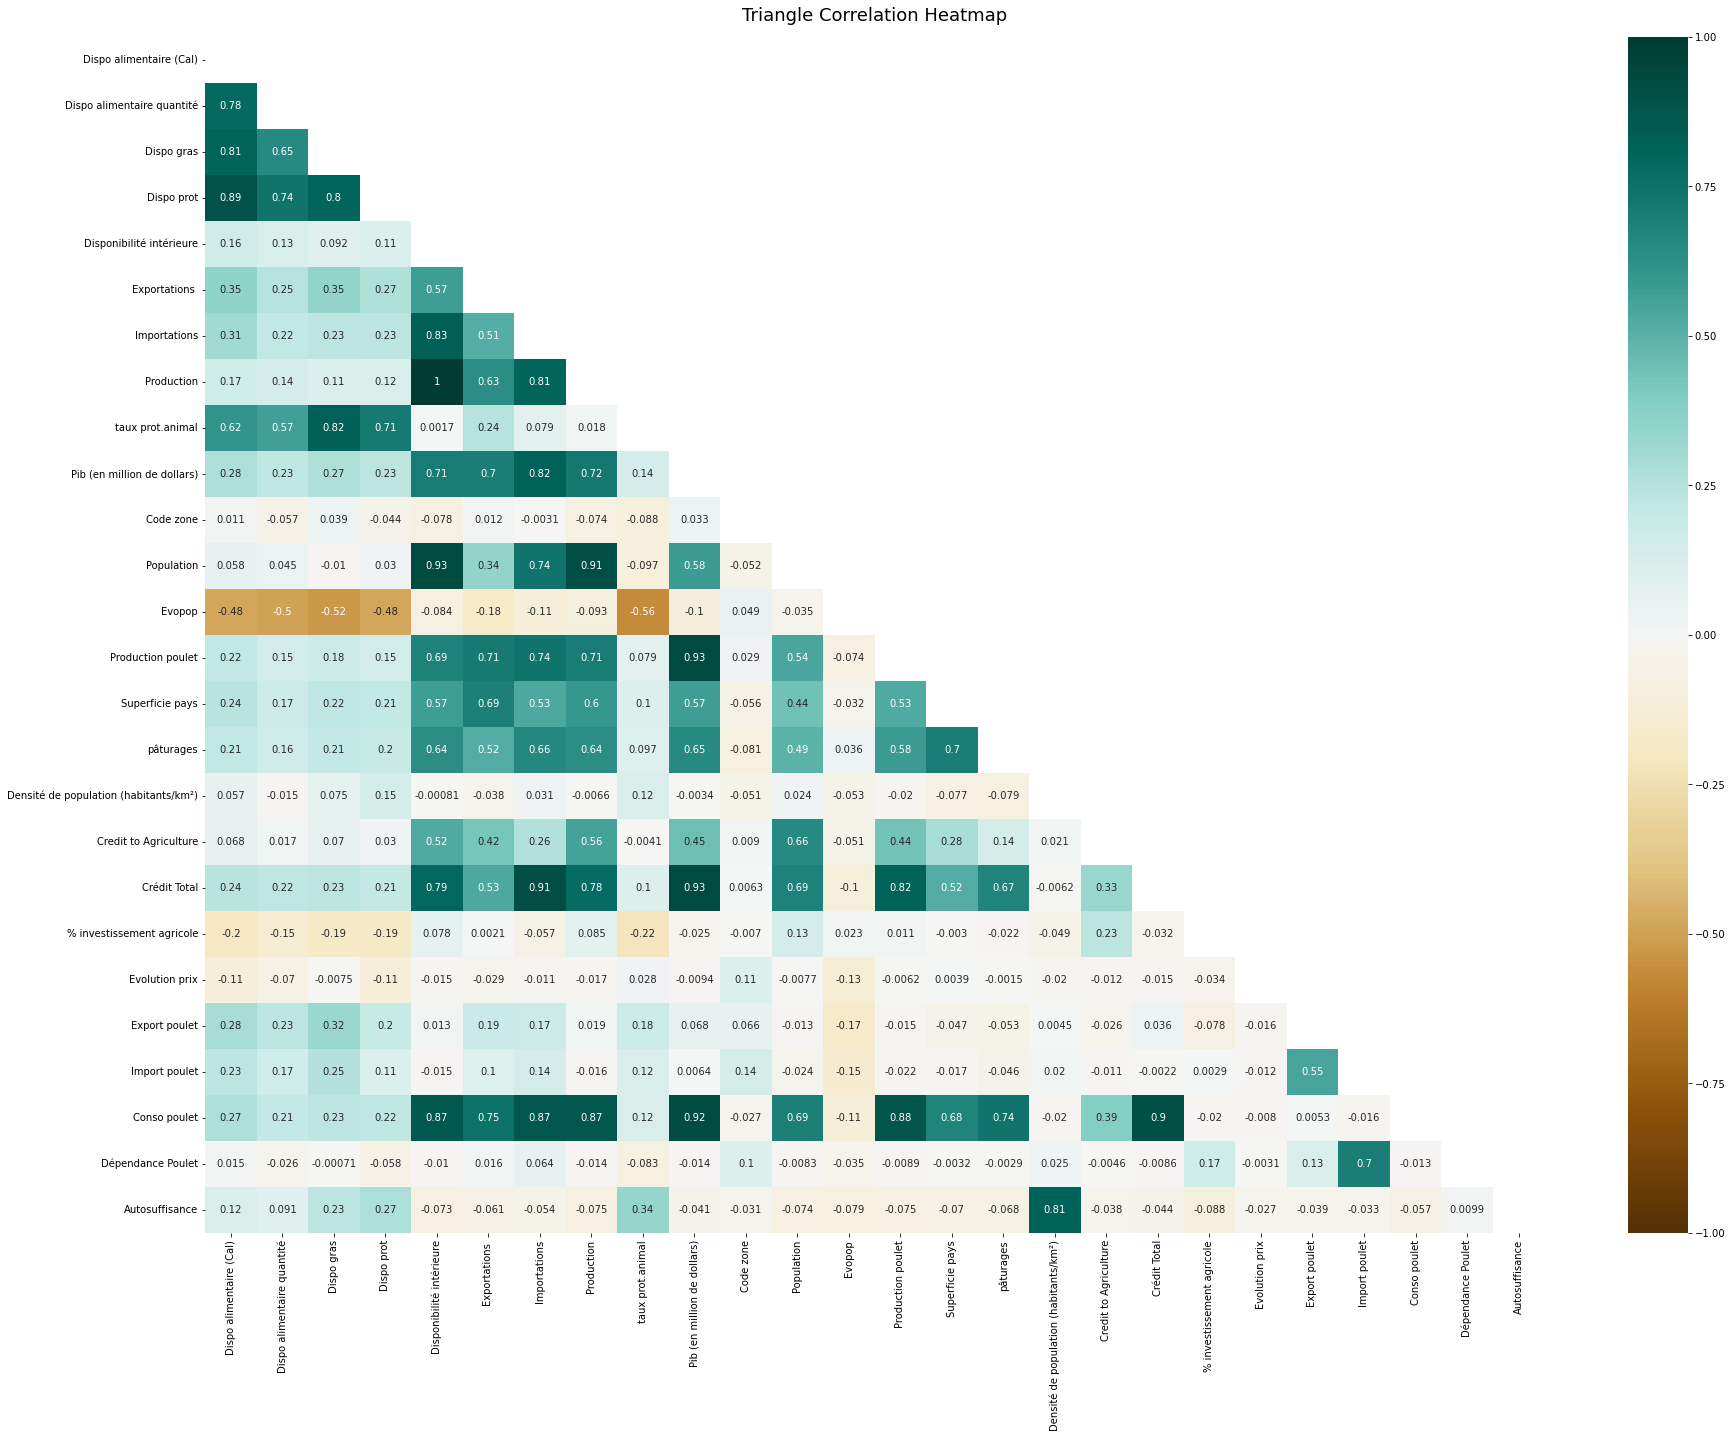

In [127]:
plt.figure(figsize=(30, 22))
mask = np.triu(np.ones_like(correl, dtype=np.bool))
heatmap = sns.heatmap(correl, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

Suppression disponibilité interieur après étude des corrélations 

In [128]:
tabACP.drop(['Code zone','Disponibilité intérieure'], axis=1, inplace=True)

Suppression de certaines colonne jugé peu pertinentes

In [129]:
tabACP.drop(['Dispo alimentaire quantité','Dispo gras','Dispo prot','Exportations ','Importations','Production','taux prot.animal'],axis=1, inplace=True)

In [130]:
tabACP

,Dispo alimentaire (Cal),Pib (en million de dollars),Population,Evopop,Production poulet,Superficie pays,pâturages,Densité de population (habitants/km²),Credit to Agriculture,Crédit Total,% investissement agricole,Evolution prix,Export poulet,Import poulet,Conso poulet,Dépendance Poulet,Autosuffisance
Zone,,,,,,,,,,,,,,,,,
Afghanistan,2267.0,1.841885e+04,37171921.0,15.19,1.438800e+07,652860.0,300000.00,56.937048,2.391254e+07,5.748208e+08,4.16,111.769731,0.00,16.0,53,1.112038e-06,0.000004
Afrique du Sud,2899.0,3.680939e+05,57792518.0,7.65,1.760780e+08,1219090.0,839280.00,47.406277,0.000000e+00,0.000000e+00,0.00,123.035392,0.00,0.0,2156,0.000000e+00,0.000012
Albanie,3295.0,1.515644e+04,2882740.0,-0.72,7.272000e+06,28750.0,4780.81,100.269217,0.000000e+00,3.128536e+09,0.00,110.202018,0.00,1433.0,27,1.970572e-04,0.000004
Algérie,3379.0,1.754152e+05,42228408.0,10.72,1.354730e+08,2381741.0,328418.30,17.730059,0.000000e+00,0.000000e+00,0.00,112.253368,0.00,240.0,286,1.771571e-06,0.000002
Angola,2445.0,1.013532e+05,30809787.0,18.43,3.767000e+07,1246700.0,517374.90,24.713072,0.000000e+00,1.644742e+10,0.00,197.919955,0.00,57.0,376,1.513140e-06,0.000010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,3048.0,4.222150e+05,9630959.0,4.71,2.448500e+07,98647.9,3000.00,97.629640,5.402314e+08,4.110108e+11,0.13,105.853047,41.43,60.2,303,7.665918e-07,0.000012
Équateur,2556.0,1.075620e+05,17084358.0,8.77,1.584730e+08,256370.0,30940.00,66.639459,0.000000e+00,1.747206e+09,0.00,101.372941,0.00,167.0,331,1.053807e-06,0.000002
États-Unis d'Amérique,3859.0,2.052716e+07,327096265.0,3.38,9.038300e+09,9831510.0,2453735.54,33.270196,7.880900e+10,9.419544e+12,0.84,98.923767,0.00,92.0,18618,1.017891e-08,0.000002


In [131]:
newdf=pd.DataFrame(tabACP)

In [132]:
newdf.to_csv('aaa.csv')